# Kaggle Bike Sharing Demand Challenge

- 共享单车是城市公共交通的重要组成部分，很好的解决了"最后一公里"的问题,同时也是城市低碳、绿色生活的新风尚。
- 共享单车系统是共享经济的一项实际应用，政府或项目经营企业在城市各处投放一定数量的共享单车，用户通过移动端APP扫码等形式开锁使用共享单车，使用结束后，将单车停靠在合理区域，关锁结束使用，用户结束计费。共享单车等共享经济项目，通过互联网媒介，合理调配使用社会资源，最大限度的发挥了资源的使用价值，很大程度上降低了社会运行成本。
- 共享单车的投放量是共享单车项目运营过程中需要考虑的关键问题之一，过低的投放量会影响市场占有率和用户体验（用户在附近没有可使用单车），过高的投放量会增加项目固定投入和后续运营的成本。因此，确定一个合理的投放量，对于共享单车项目的成功运行，是至关重要的。
- 共享单车的投放量计算的时候，需要考虑共享单车的实际需求量，此次kaggle竞赛的题目，就是通过历史运营过程的数据，来构建相关模型，预测未来共享单车的需求量。
- 竞赛数据包含每天每个小时的天气状况和日期时间戳等信息，训练数据还包括注册用户和非注册用户的共享单车使用情况。

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('../inputs/train.csv')
test = pd.read_csv('../inputs/test.csv')

In [3]:
test['registered'] = np.nan
test['casual'] = np.nan
test['count'] = np.nan
data = pd.concat([train,test],axis=0)
print(train.shape,test.shape,data.shape)

(10886, 12) (6493, 12) (17379, 12)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null object
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


### 特征描述

- datetime（时间戳）:   date and hour in "mm/dd/yyyy hh:mm" format
- season（季节）:     Four categories-> 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday（是否为节假日）:    whether the day is a holiday or not (1/0)
- workingday（是否为工作日）: whether the day is neither a weekend nor holiday (1/0)
- weather（天气状况）:    Four Categories of weather
            1-> Clear, Few clouds, Partly cloudy, Partly cloudy
            2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3-> Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp（温度）:       hourly temperature in Celsius
- atemp（体感温度）:      "feels like" temperature in Celsius
- humidity（相对湿度）:   relative humidity
- windspeed（风速）:  wind speed
- registered（注册用户单车使用量）: number of registered user
- casual（非注册用户单车使用量）:     number of non-registered user
- count（单车使用量）:      number of total rentals (registered + casual)

In [5]:
data.describe()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
count,17379.000000,10886.000000,10886.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,23.788755,36.021955,191.574132,0.028770,62.722884,155.552177,2.501640,20.376474,1.425283,12.736540,0.682721
std,8.592511,49.960477,181.144454,0.167165,19.292983,151.039033,1.106918,7.894801,0.639357,8.196795,0.465431
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000
25%,16.665000,4.000000,42.000000,0.000000,48.000000,36.000000,2.000000,13.940000,1.000000,7.001500,0.000000
50%,24.240000,17.000000,145.000000,0.000000,63.000000,118.000000,3.000000,20.500000,1.000000,12.998000,1.000000
75%,31.060000,49.000000,284.000000,0.000000,78.000000,222.000000,3.000000,27.060000,2.000000,16.997900,1.000000
max,50.000000,367.000000,977.000000,1.000000,100.000000,886.000000,4.000000,41.000000,4.000000,56.996900,1.000000


In [6]:
display(data.head().transpose())

,0,1,2,3,4
atemp,14.395,13.635,13.635,14.395,14.395
casual,3,8,5,3,0
count,16,40,32,13,1
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
holiday,0,0,0,0,0
humidity,81,80,80,75,75
registered,13,32,27,10,1
season,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
weather,1,1,1,1,1


### 数据缺失状况

In [7]:
MissingCounts = data.apply(lambda x: x.isnull().sum())
print(len(test))
print(MissingCounts)

6493
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64


## 数据初步探索

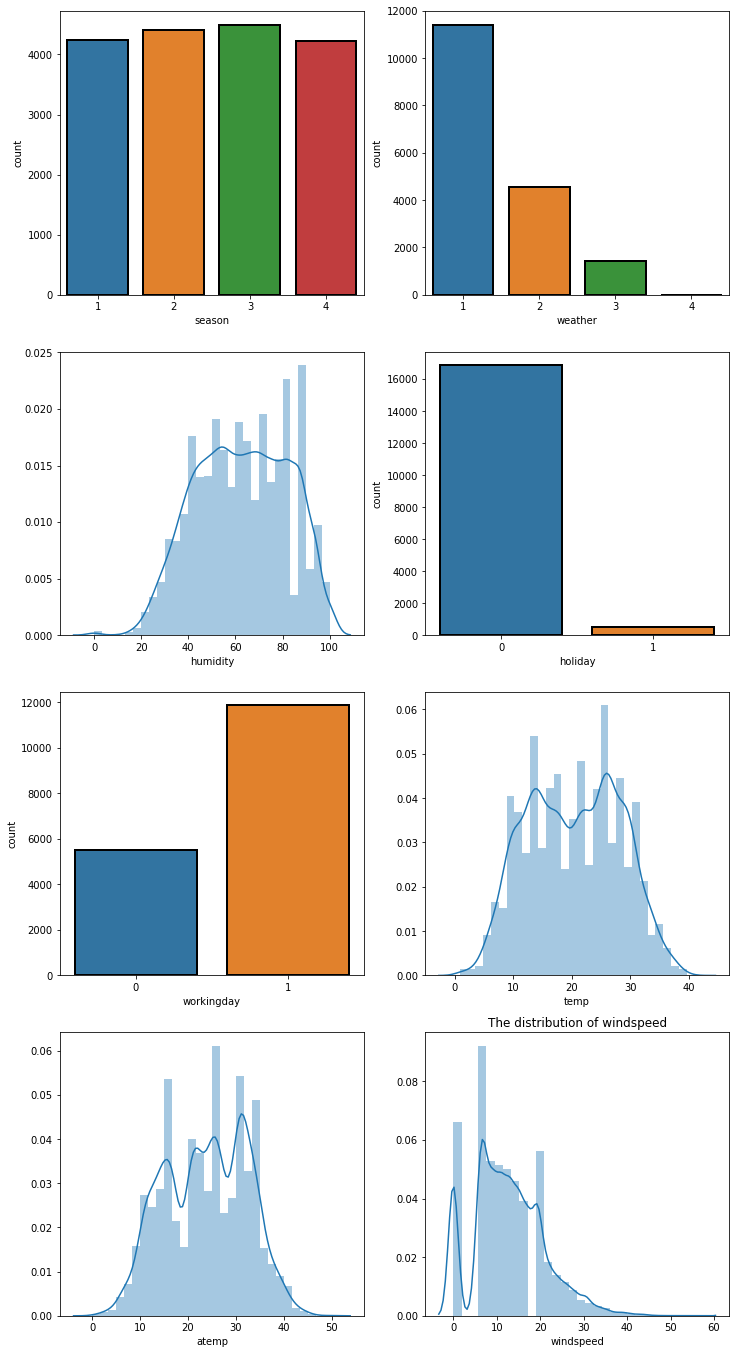

In [8]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(12,24))
sns.countplot(data['season'],ax=axes[0,0],edgecolor='black',linewidth=2)
plt.title('The count of season')
sns.countplot(data['weather'],ax=axes[0,1],edgecolor='black',linewidth=2)
plt.title('The count of weather')
sns.distplot(data['humidity'],bins=30,ax=axes[1,0])
plt.title('The distribution of humidity')
sns.countplot(data['holiday'],ax=axes[1,1],edgecolor='black',linewidth=2)
plt.title('The count of holiday')
sns.countplot(data['workingday'],ax=axes[2,0],edgecolor='black',linewidth=2)
plt.title('The count of workingday')
sns.distplot(data['temp'],bins=30,ax=axes[2,1])
plt.title('The distribution of temp')
sns.distplot(data['atemp'],bins=30,ax=axes[3,0])
plt.title('The distribution of atemp')
sns.distplot(data['windspeed'],bins=30,ax=axes[3,1])
plt.title('The distribution of windspeed')
plt.show()

- 1.数据采集均衡，四个季节分布均衡。
- 2.天气状况以1类为主，较为温和，4类恶劣天气较少。
- 3.非节假日时间占据绝对多数，工作日时间比非工作日时间接近1:2.5。
- 4.湿度、温度和体感问题分布较为合理，一定程度上符合正态分布。
- 5.风速数据存在大量为0的值，应该上数据缺失，后续考虑做填充。

In [9]:
for val in ['season','weather']:
    data[val].astype('object')
    display(data[data['count'].notnull()].groupby(val)[['casual','registered']].sum())

,casual,registered
season,,
1,41605.0,270893.0
2,129672.0,458610.0
3,142718.0,497944.0
4,78140.0,465894.0


,casual,registered
weather,,
1,289900.0,1186163.0
2,87246.0,419914.0
3,14983.0,87106.0
4,6.0,158.0


In [10]:
data['datetime'] = pd.to_datetime(data['datetime'],errors='coerce')
display(data['datetime'].head())

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [11]:
data['hour'] = data['datetime'].apply(lambda x: x.hour)
data['hour'] = data['hour'].astype('int')
display(data.head(5).transpose())

,0,1,2,3,4
atemp,14.395,13.635,13.635,14.395,14.395
casual,3,8,5,3,0
count,16,40,32,13,1
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
holiday,0,0,0,0,0
humidity,81,80,80,75,75
registered,13,32,27,10,1
season,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
weather,1,1,1,1,1


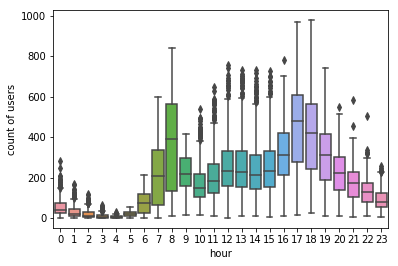

In [12]:
plt.figure()
sns.boxplot(data=data,x='hour',y='count')
plt.ylabel('count of users')
plt.show()

我们将数据按照'hour'进行分组聚合，考察每小时需求总量'count'的分布情况。
- 7-9点和17-19点是单车使用高峰期，这两个时间为上下班高峰。
- 10-16点单车需求较为均衡。
- 0-6点和20-24点点单车需求较少。

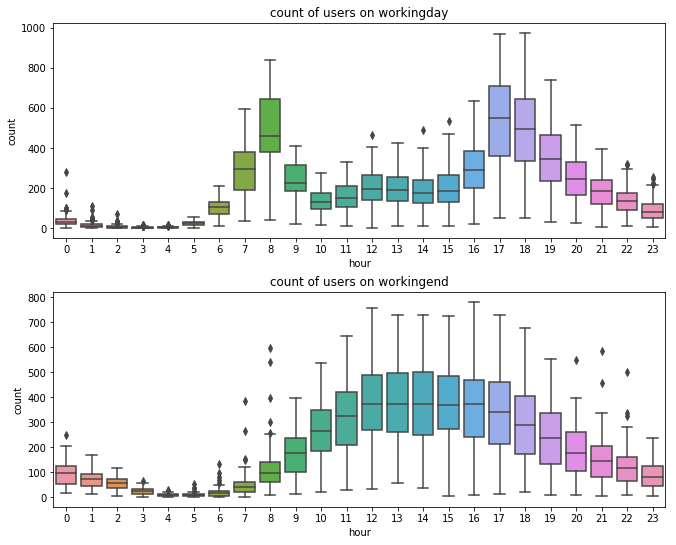

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(data=data[data['workingday']==1],x='hour',y='count')
plt.title('count of users on workingday')
plt.subplot(212)
sns.boxplot(data=data[data['workingday']==0],x='hour',y='count')
plt.title('count of users on workingend')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

我们把数据拆分为工作日和非工作日。在工作日，两个需求量高峰时间段更为明显；在非工作日，需求量从6点-11点是一个持续增长的过程，12-17点是需求量的平稳高峰期，18点到凌晨3点，是一个需求量持续下降的过程。

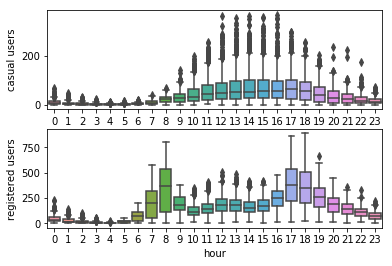

In [14]:
plt.subplot(211)
sns.boxplot(data=data,x='hour',y='casual')
plt.ylabel('casual users')
plt.subplot(212)
sns.boxplot(data=data,x='hour',y='registered')
plt.ylabel('registered users')
plt.show()

按用户类型进行分组，注册用户的需求趋势和总趋势是一致的，在7-9点和17-19点有两个高峰时间段，10-16点之间维持较低点平稳需求；非注册用户点需求规律则不一样，从7-12点，需求量逐渐上升，13-18点维持较为平稳点高需求，19-23点需求持续下降，0-6点维持很低点使用需求。同时，我们也注意到，非注册用户的单车需求量方差较大，存在大量的异常值，因此可以看出，非注册用户的需求不稳定。

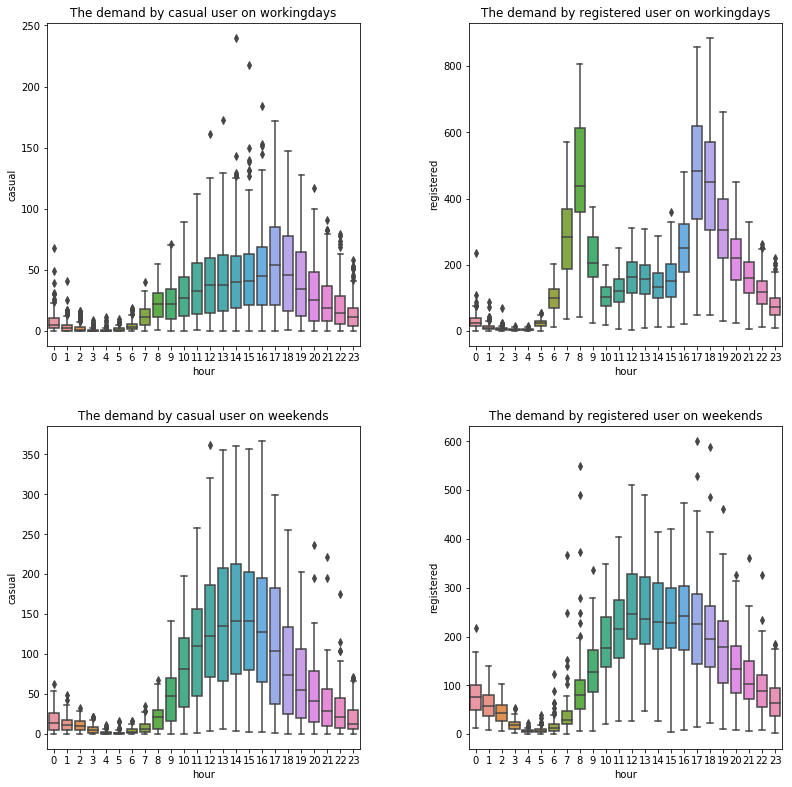

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(data=data[(data['workingday']==1)&(data['count'].notnull())],x='hour',y='casual')
plt.title('The demand by casual user on workingdays')
plt.subplot(222)
sns.boxplot(data=data[(data['workingday']==1)&(data['count'].notnull())],x='hour',y='registered')
plt.title('The demand by registered user on workingdays')
plt.subplot(223)
sns.boxplot(data=data[(data['workingday']==0)&(data['count'].notnull())],x='hour',y='casual')
plt.title('The demand by casual user on weekends')
plt.subplot(224)
sns.boxplot(data=data[(data['workingday']==0)&(data['count'].notnull())],x='hour',y='registered')
plt.title('The demand by registered user on weekends')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

我们将数据拆分为4组：
- 1.非注册用户工作日的24小时每小时的用车需求；
- 2.注册用户工作日的24小时每小时的用车需求；
- 3.非注册用户非工作日的24小时每小时的用车需求；
- 4.注册用户非工作日的24小时每小时的用车需求。


- 1、3、4类用户的需求情况比较类似，没有明显存在7-9点和17-19点的两个高峰需求时间段；6-12点需求量逐渐爬升，12-17点需求量维持较高点平稳期，18-23点需求量逐渐下降，0-6点需求量处于最低状态。
- 2类用户点需求情况则符合我们之前对所有用户在所有时期内的分布情况，在7-9点和17-19点之间，存在两个非常明显点需求量高峰期。

因此，我们大致可以判断，工作日上下班时间使用共享单车，是一种粘性较强的用户需求，因此会吸引较多的注册用户，而非注册用户则不存在这样的特征，用车需求只是随着一天的作息节奏变化；而在工作日之外使用共享单车，注册用户与非注册用户的情况基本一致，用车需求只是随着一天的作息节奏变化。

In [16]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image

In [17]:
fit_data = data[data['count'].notnull()]

In [18]:
casual_tree = DecisionTreeRegressor(max_leaf_nodes=10)
casual_tree = casual_tree.fit(fit_data['hour'].values.reshape(-1,1),fit_data['casual'])

In [19]:
dot_data = tree.export_graphviz(casual_tree, out_file=None, 
                         feature_names=['hour'],  
                         class_names=['casual'],  
                         filled=True, rounded=True,  
                         special_characters=True)

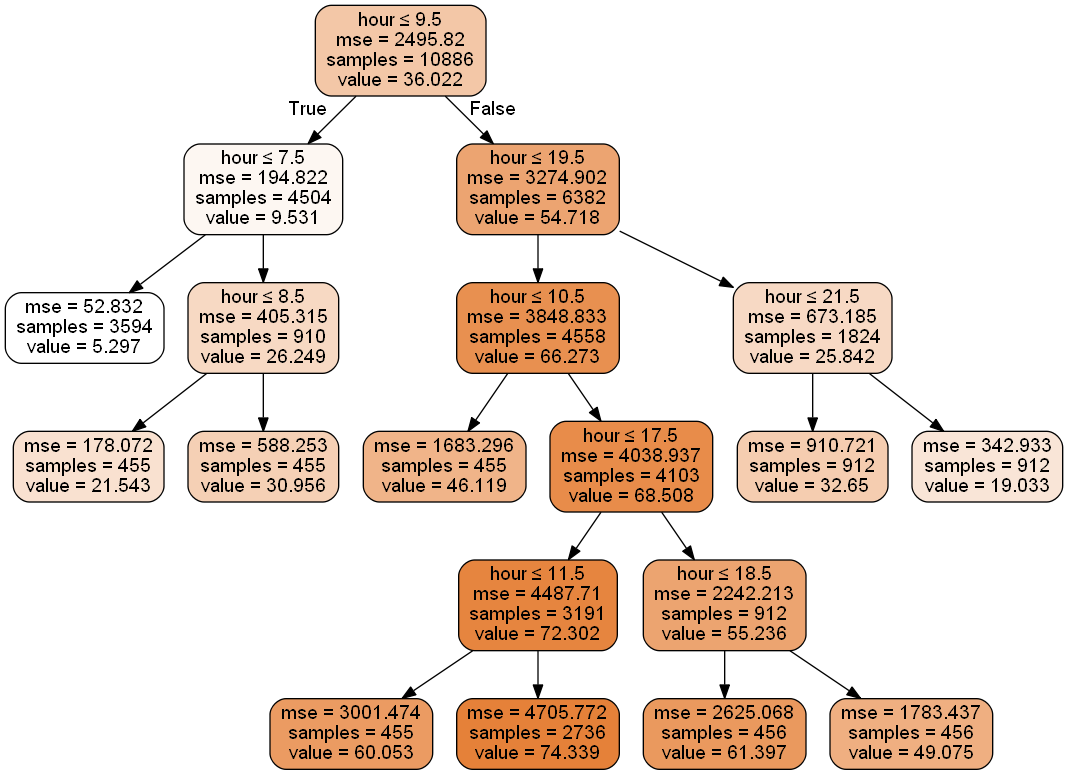

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [21]:
data['dp_cas'] = pd.cut(data['hour'],bins=[0,7.5,8.5,9.5,10.5,11.5,17.5,18.5,19.5,23],right=False,labels=False)
print(data['dp_cas'].value_counts().sort_index())

0.0    5728
1.0     727
2.0     727
3.0     727
4.0     727
5.0    4375
6.0     728
7.0     728
8.0    2184
Name: dp_cas, dtype: int64


In [22]:
registered_tree = DecisionTreeRegressor(max_leaf_nodes=10)
registered_tree = registered_tree.fit(fit_data['hour'].values.reshape(-1,1),fit_data['registered'])

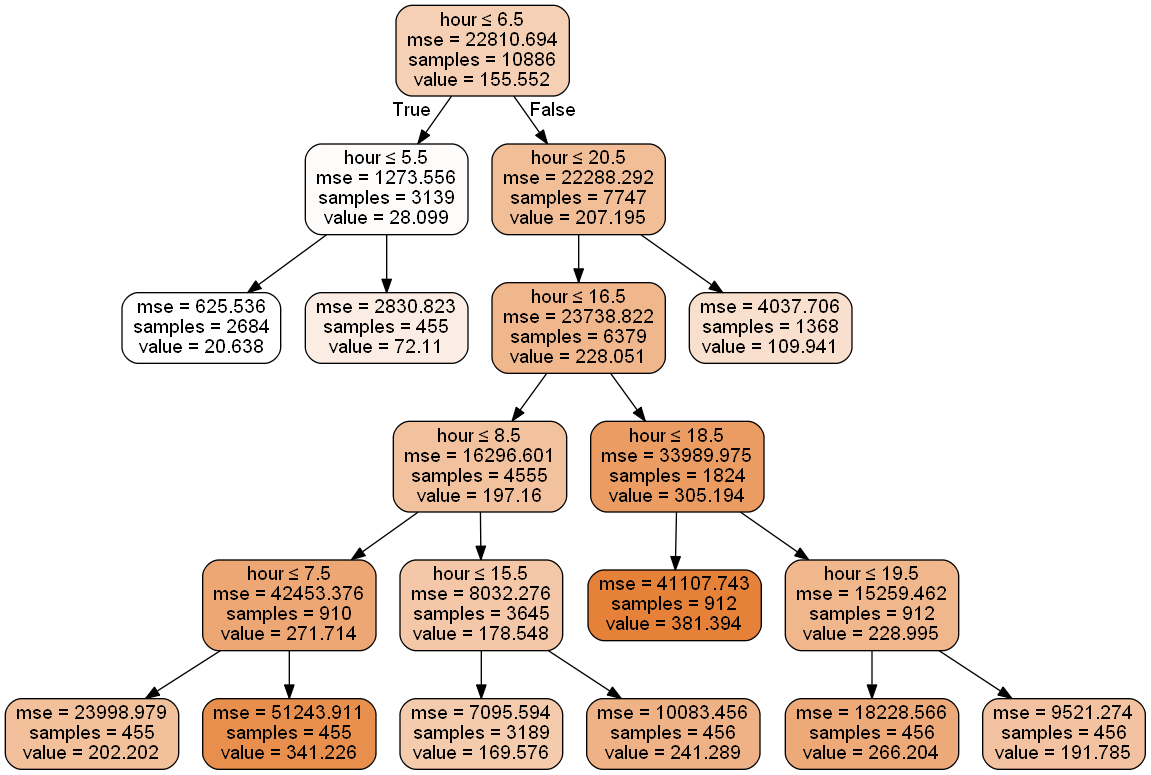

In [23]:
dot_data = tree.export_graphviz(registered_tree, out_file=None, 
                         feature_names=['hour'],  
                         class_names=['registered'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [24]:
data['dp_reg'] = pd.cut(data['hour'],bins=[0,5.5,6.5,7.5,8.5,15.5,16.5,18.5,19.5,20.5,23],right=False,labels=False)
print(data['dp_reg'].value_counts().sort_index())

0.0    4276
1.0     725
2.0     727
3.0     727
4.0    5096
5.0     730
6.0    1458
7.0     728
8.0     728
9.0    1456
Name: dp_reg, dtype: int64


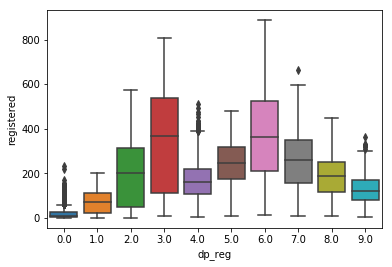

In [25]:
plt.figure()
sns.boxplot(x = data['dp_reg'],y=data['registered'])
plt.ylabel('registered')
plt.show()

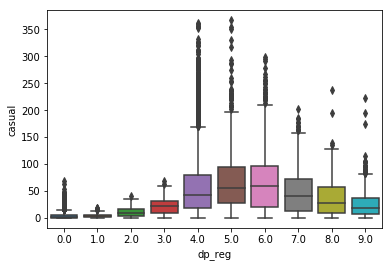

In [26]:
plt.figure()
sns.boxplot(x = data['dp_reg'],y=data['casual'])
plt.show()

### humidity

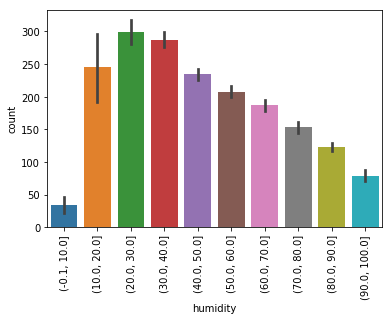

In [27]:
plt.figure()
plot_data = data[data['count'].notnull()]
sns.barplot(x=pd.cut(plot_data['humidity'],bins=10),y=plot_data['count'])
plt.xticks(rotation=90)
plt.show()

In [28]:
casual_tree = DecisionTreeRegressor(max_leaf_nodes=6)
casual_tree = casual_tree.fit(fit_data['humidity'].values.reshape(-1,1),fit_data['casual'])

In [29]:
dot_data = tree.export_graphviz(casual_tree, out_file=None, 
                         feature_names=['humidity'],  
                         class_names=['casual'],  
                         filled=True, rounded=True,  
                         special_characters=True)

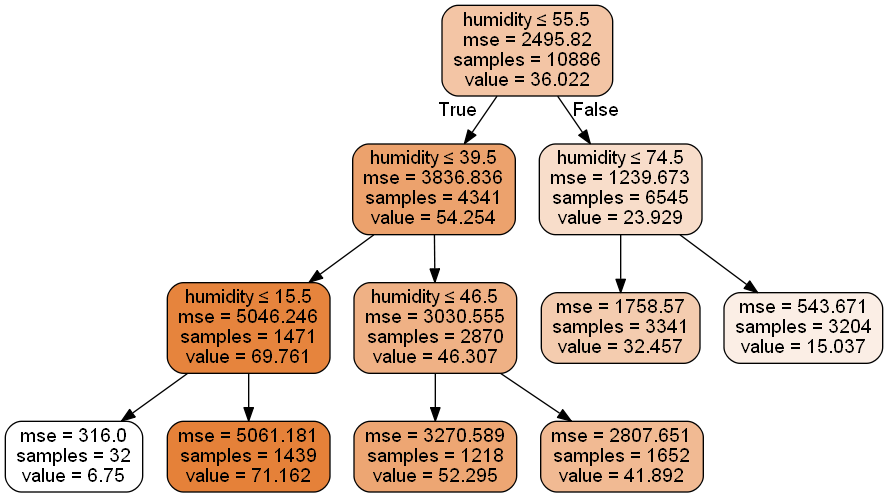

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
data['dh_cas'] = pd.cut(data['humidity'],bins=[-0.1,15.5,39.5,46.5,55.5,74.5,100],labels=False,right=True)
display(data['dh_cas'].value_counts().sort_index())

0      32
1    2223
2    1827
3    2560
4    5320
5    5417
Name: dh_cas, dtype: int64

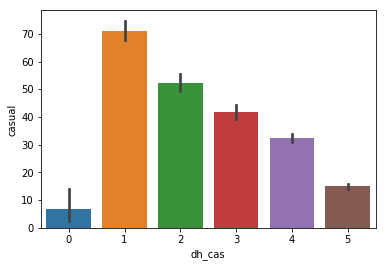

In [32]:
sns.barplot(data=data[data['count'].notnull()],x='dh_cas',y='casual')

In [33]:
registered_tree = DecisionTreeRegressor(max_leaf_nodes=6)
registered_tree = registered_tree.fit(fit_data['humidity'].values.reshape(-1,1),fit_data['registered'])

In [34]:
dot_data = tree.export_graphviz(registered_tree, out_file=None, 
                         feature_names=['humidity'],  
                         class_names=['registered'],  
                         filled=True, rounded=True,  
                         special_characters=True)

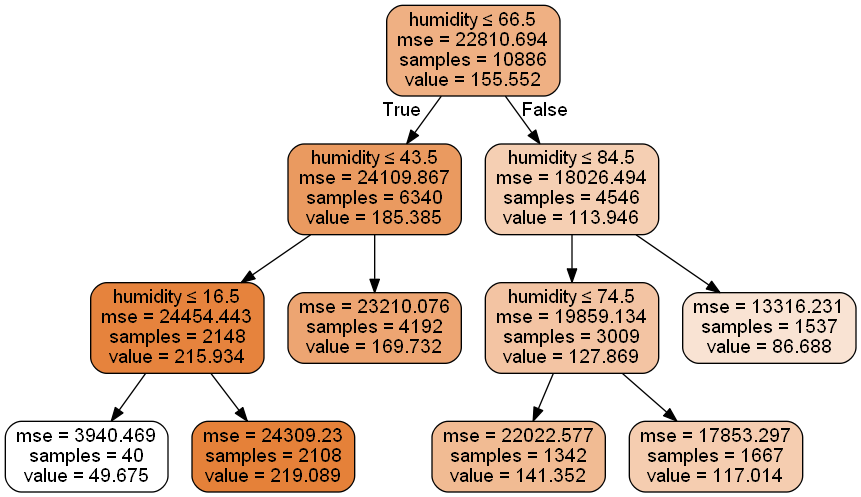

In [35]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
data['dh_reg'] = pd.cut(data['humidity'],bins=[-0.1,16.5,45.5,66.5,74.5,84.5,100],labels=False,right=True)
display(data['dh_reg'].value_counts().sort_index())

0      42
1    3724
2    6032
3    2164
4    2777
5    2640
Name: dh_reg, dtype: int64

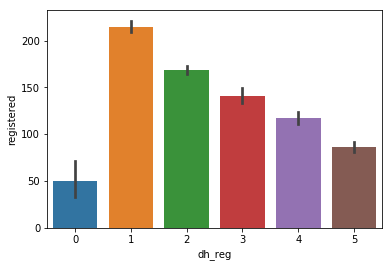

In [37]:
sns.barplot(data=data[data['count'].notnull()],x='dh_reg',y='registered')

### temp

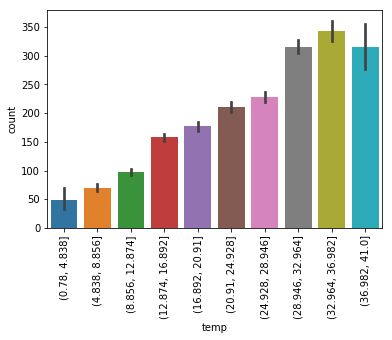

In [38]:
plt.figure()
plot_data = data[data['count'].notnull()]
sns.barplot(x=pd.cut(plot_data['temp'],bins=10),y=plot_data['count'])
plt.xticks(rotation=90)
plt.show()

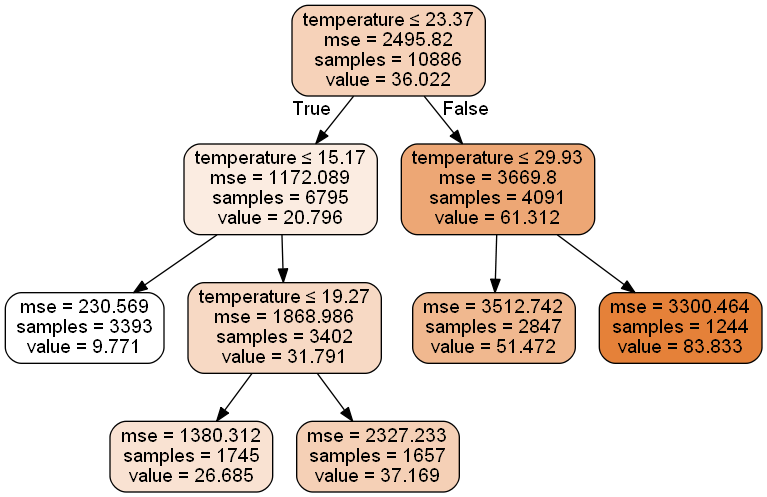

In [39]:
casual_tree = DecisionTreeRegressor(max_leaf_nodes=5)
casual_tree = casual_tree.fit(fit_data['temp'].values.reshape(-1,1),fit_data['casual'])
dot_data = tree.export_graphviz(casual_tree, out_file=None, 
                         feature_names=['temperature'],  
                         class_names=['casual'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

0    5441
1    2600
2    2523
3    4700
4    2115
Name: dt_cas, dtype: int64

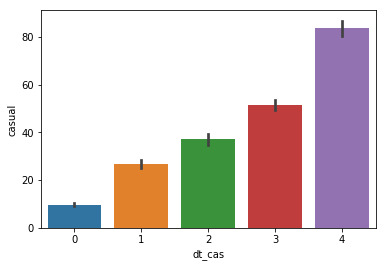

In [40]:
data['dt_cas'] = pd.cut(data['temp'],bins=[0,15.17,19.27,23.37,29.93,42],labels=False,right=True)
display(data['dt_cas'].value_counts().sort_index())
sns.barplot(data=data[data['count'].notnull()],x='dt_cas',y='casual')

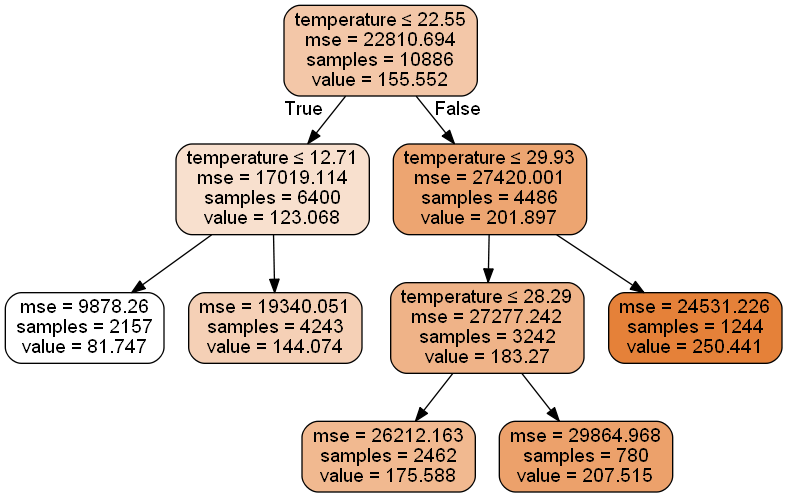

In [41]:
registered_tree = DecisionTreeRegressor(max_leaf_nodes=5)
registered_tree = registered_tree.fit(fit_data['temp'].values.reshape(-1,1),fit_data['registered'])
dot_data = tree.export_graphviz(registered_tree, out_file=None, 
                         feature_names=['temperature'],  
                         class_names=['registered'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

0    3514
1    6471
2    4019
3    1260
4    2115
Name: dt_reg, dtype: int64

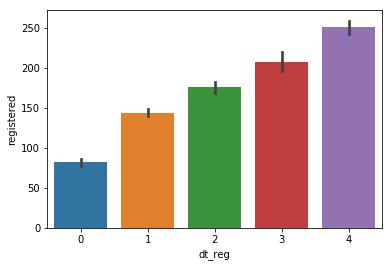

In [42]:
data['dt_reg'] = pd.cut(data['temp'],bins=[0,12.71,22.55,28.29,29.93,42],labels=False,right=True)
display(data['dt_reg'].value_counts().sort_index())
sns.barplot(data=data[data['count'].notnull()],x='dt_reg',y='registered')

### atemp

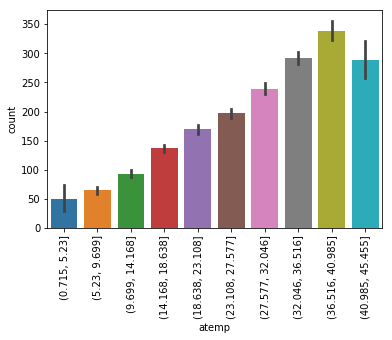

In [43]:
plt.figure()
plot_data = data[data['count'].notnull()]
sns.barplot(x=pd.cut(plot_data['atemp'],bins=10),y=plot_data['count'])
plt.xticks(rotation=90)
plt.show()

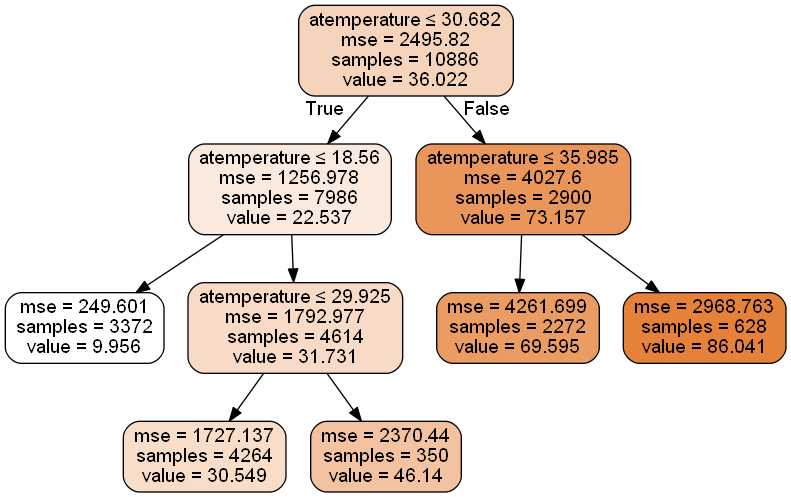

In [44]:
casual_tree = DecisionTreeRegressor(max_leaf_nodes=5)
casual_tree = casual_tree.fit(fit_data['atemp'].values.reshape(-1,1),fit_data['casual'])
dot_data = tree.export_graphviz(casual_tree, out_file=None, 
                         feature_names=['atemperature'],  
                         class_names=['casual'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

0.0    5382
1.0    6716
2.0     588
3.0    3612
4.0    1070
Name: dat_cas, dtype: int64

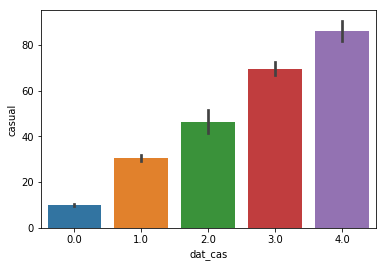

In [45]:
data['dat_cas'] = pd.cut(data['atemp'],bins=[0,18.56,29.925,30.682,35.985,46],labels=False,right=True)
display(data['dat_cas'].value_counts().sort_index())
sns.barplot(data=data[data['count'].notnull()],x='dat_cas',y='casual')

In [ ]:
registered_tree = DecisionTreeRegressor(max_leaf_nodes=5)
registered_tree = registered_tree.fit(fit_data['atemp'].values.reshape(-1,1),fit_data['registered'])
dot_data = tree.export_graphviz(registered_tree, out_file=None, 
                         feature_names=['atemperature'],  
                         class_names=['registered'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
data['dat_cas'] = pd.cut(data['atemp'],bins=[0,14.773,19.318,29.925,35.228,46],labels=False,right=True)
display(data['dat_cas'].value_counts().sort_index())
sns.barplot(data=data[data['count'].notnull()],x='dat_cas',y='casual')

### diff_temp

In [46]:
data['diff_temp'] = data['atemp'] - data['temp']

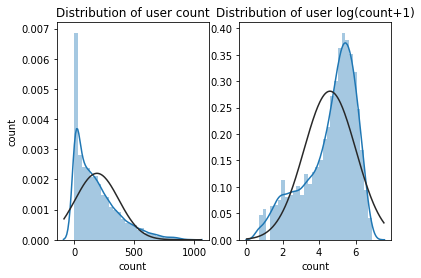

In [47]:
plt.figure()
plt.subplot(121)
sns.distplot(train['count'],bins=30,fit=stats.norm)
plt.ylabel('count')
plt.title('Distribution of user count')
plt.subplot(122)
sns.distplot(np.log1p(train['count']),bins=30,fit=stats.norm)
plt.title('Distribution of user log(count+1)')
plt.show()

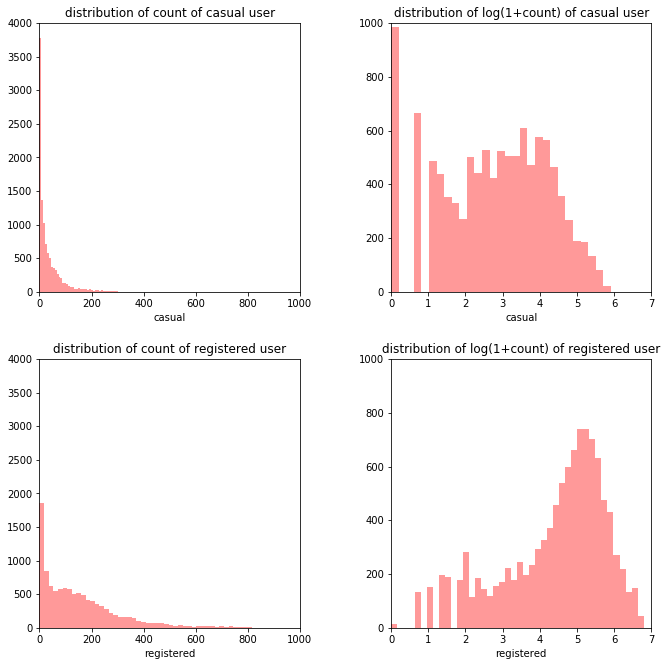

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(a=train['casual'],kde=False,color='r')
plt.title('distribution of count of casual user')
plt.axis([0,1000,0,4000])
plt.subplot(222)
sns.distplot(a=np.log1p(train['casual']),kde=False,color='r')
plt.axis([0,7,0,1000])
plt.title('distribution of log(1+count) of casual user')
plt.subplot(223)
sns.distplot(a=train['registered'],kde=False,color='r')
plt.title('distribution of count of registered user')
plt.axis([0,1000,0,4000])
plt.subplot(224)
sns.distplot(a=np.log1p(train['registered']),kde=False,color='r')
plt.title('distribution of log(1+count) of registered user')
plt.axis([0,7,0,1000])
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

### Daily Trend

In [49]:
data['weekday'] = data['datetime'].apply(lambda x: x.weekday())
data['date'] = data['datetime'].apply(lambda x: x.date())
display(data[['date','weekday']].head())

,date,weekday
0,2011-01-01,5
1,2011-01-01,5
2,2011-01-01,5
3,2011-01-01,5
4,2011-01-01,5


In [50]:
train_sum_date = data[data['count'].notnull()].groupby(['date'])[['casual','registered']].sum().reset_index()
train_sum_date['weekday'] = train_sum_date['date'].apply(lambda x: x.weekday())
display(train_sum_date.head())

,date,casual,registered,weekday
0,2011-01-01,331.0,654.0,5
1,2011-01-02,131.0,670.0,6
2,2011-01-03,120.0,1229.0,0
3,2011-01-04,108.0,1454.0,1
4,2011-01-05,82.0,1518.0,2


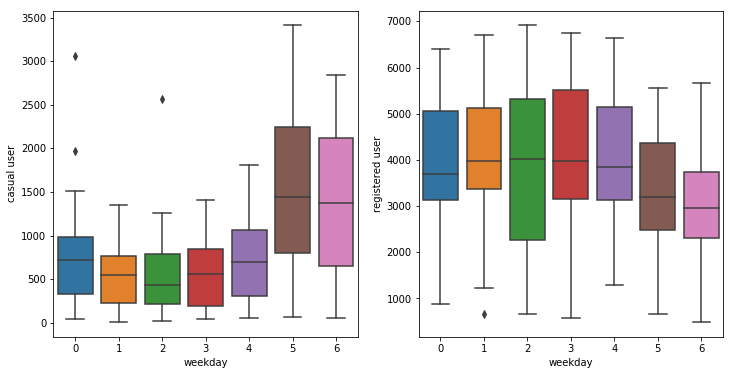

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=train_sum_date,x='weekday',y='casual')
plt.ylabel('casual user')
plt.subplot(122)
sns.boxplot(data=train_sum_date,x='weekday',y='registered')
plt.ylabel('registered user')
plt.show()

从上图可以很清楚的发现：
- 1.非注册用户的总体需求量是远低于注册用户的，非注册用户每日的需求量大约在500-1500之间，而注册用户的需求量在3000-5000之间。
- 2.非注册用户周一到周五的需求量较低，每天的需求量维持在500上下，周六周天是平常需求量的2倍；而注册用户则相反，周一到周五的需求量较高，而且十分稳定，每天的需求量维持在4000左右，周六周天相对低一些。

In [52]:
data['weekend'] = 0
data['weekend'][(data['weekday']==5)|(data['weekday']==6)] = 1
display(data['weekend'].value_counts())

0    12365
1     5014
Name: weekend, dtype: int64

## season

In [53]:
data['year'] = data['datetime'].apply(lambda x: x.year)
display(data['year'].value_counts())

2012    8734
2011    8645
Name: year, dtype: int64

In [54]:
display(data[data['count'].notnull()].groupby(['season','year'])[['casual','registered']].sum())

casual  registered
season year                     
1      2011  13694.0     81437.0
       2012  27911.0    189456.0
2      2011  47694.0    172312.0
       2012  81978.0    286298.0
3      2011  62036.0    193212.0
       2012  80682.0    304732.0
4      2011  32393.0    179201.0
       2012  45747.0    286693.0

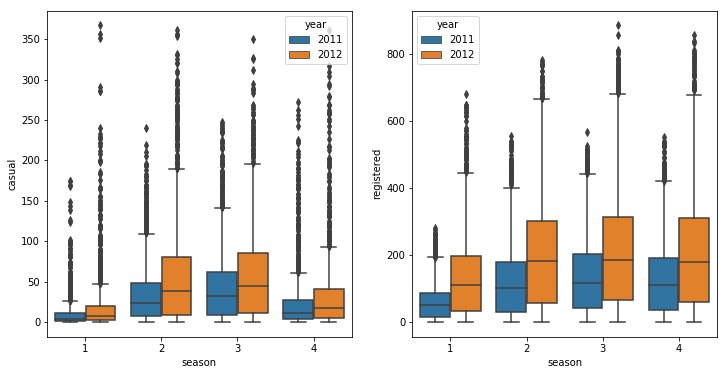

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=data[data['count'].notnull()],x='season',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=data[data['count'].notnull()],x='season',hue='year',y='registered')
plt.show()

共享单车的需求量在夏季和秋季会高一些，冬春季节和低一些，此外，2012年明显比2011年的需求量增长了很多。

### weather

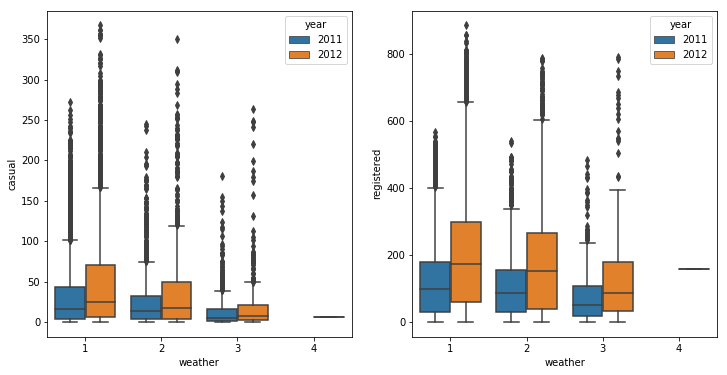

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=data[data['count'].notnull()],x='weather',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=data[data['count'].notnull()],x='weather',hue='year',y='registered')
plt.show()

越恶劣的天气状况，共享单车的需求量就越低。

## month

In [57]:
data['month'] = data['datetime'].apply(lambda x: x.month)
display(data['month'].head())

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

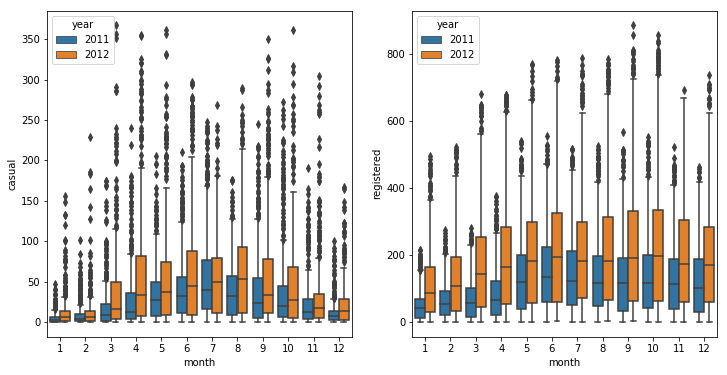

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=data[data['count'].notnull()],x='month',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=data[data['count'].notnull()],x='month',hue='year',y='registered')
plt.show()

- 1.需求量变化趋势与`season`类似，夏秋季节（4-9月）的需求量比冬春季节要明显高一些。
- 2.2012年的需求量明显比2011年有增长。
- 3.注册用户的需求量在冬季还能保持较高，而非注册用户则明显下降。

In [59]:
data['year_part'] = np.nan
data['year_part'][data['year']==2011] = 1
data['year_part'][(data['year']==2011) & (data['month']>3)] = 2
data['year_part'][(data['year']==2011) & (data['month']>6)] = 3
data['year_part'][(data['year']==2011) & (data['month']>9)] = 4
data['year_part'][data['year']==2012] = 5
data['year_part'][(data['year']==2012) & (data['month']>3)] = 6
data['year_part'][(data['year']==2012) & (data['month']>6)] = 7
data['year_part'][(data['year']==2012) & (data['month']>9)] = 8
print(data['year_part'].value_counts())

7.0    2208
4.0    2203
3.0    2192
2.0    2183
6.0    2182
5.0    2176
8.0    2168
1.0    2067
Name: year_part, dtype: int64


### monthday

In [60]:
data['monthday'] = data['datetime'].apply(lambda x: x.day)
train_sum_monthday = data[data['count'].notnull()].groupby(['year','month','monthday'])[['casual','registered']].median().reset_index()
display(train_sum_monthday.head())

,year,month,monthday,casual,registered
0,2011,1,1,8.5,25.5
1,2011,1,2,4.0,19.0
2,2011,1,3,5.0,49.0
3,2011,1,4,2.0,50.0
4,2011,1,5,3.0,53.0


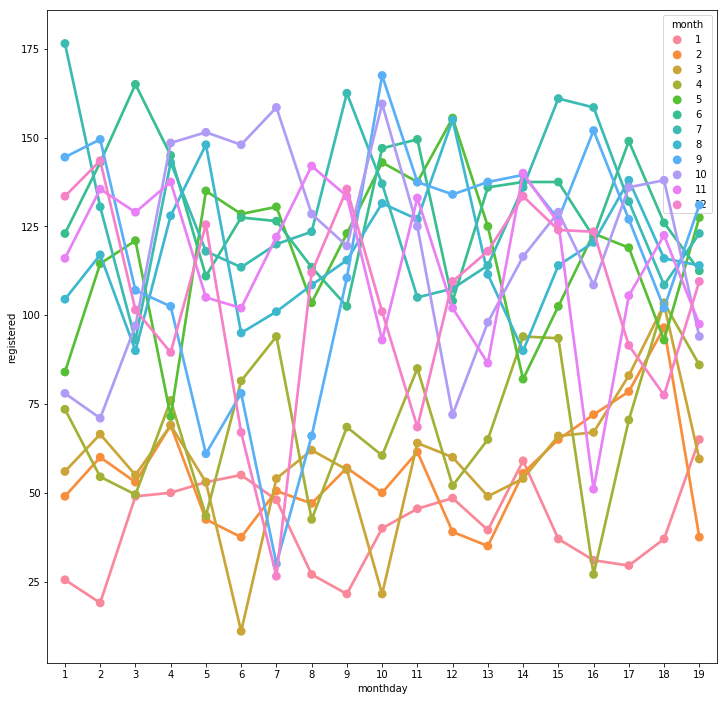

In [61]:
plt.figure(figsize=(12,12))
sns.pointplot(data=train_sum_monthday[train_sum_monthday['year']==2011],x='monthday',y='registered',hue='month')

monthday变量似乎与count不存在相关性。

In [62]:
data['day_type'] = np.nan
data['day_type'][(data['holiday'] == 0) & (data['workingday'] == 0)] = 'weekend'
data['day_type'][data['holiday'] == 1] = 'holiday'
data['day_type'][(data['holiday'] == 0) & (data['workingday'] == 1)] = 'working day'
display(data['day_type'].value_counts())

working day    11865
weekend         5014
holiday          500
Name: day_type, dtype: int64

In [63]:
numerical_vars = ['registered','casual','count','temp','atemp','diff_temp','humidity','windspeed']

In [64]:
corr_matrix = data[data['count'].notnull()][numerical_vars].corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

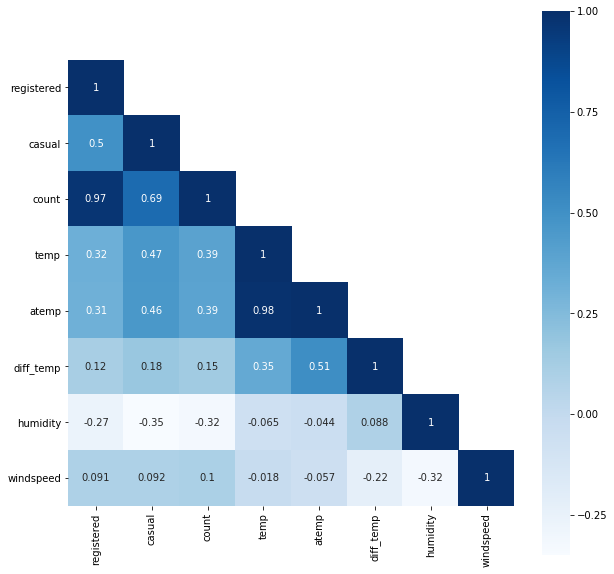

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix,annot=True,square=True,cmap=plt.cm.Blues,mask=mask,cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**`temp`和`atemp`这两个温度的变量对`casual`和`registered`有明显的正相关性，而且，非注册用户更为显著；`humidity`变量则对`casual`和`registered`有明显的负相关性，而且，非注册用户更为显著。从这里我们也可以发现，非注册用户的用户粘性较低，不稳定，对共享单车的需求受自然条件影响更为显著。**

In [66]:
display(data.head(5).transpose())

,0,1,2,3,4
atemp,14.395,13.635,13.635,14.395,14.395
casual,3,8,5,3,0
count,16,40,32,13,1
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
holiday,0,0,0,0,0
humidity,81,80,80,75,75
registered,13,32,27,10,1
season,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
weather,1,1,1,1,1


## Feature engineering

In [67]:
VarList = ['atemp','holiday','humidity','season',
           'temp','weather','windspeed','workingday',
           'hour','weekday','year','month','diff_temp']
Categorical_VarList = ['holiday','season','weather','workingday',
                       'hour','weekday','year','month']
Numerical_VarList = ['atemp','humidity','temp','windspeed','diff_temp']
Target_VarList = ['casual','registered','count']
print('There are {} variables'.format(len(VarList)))
print('{} categorival variables'.format(len(Categorical_VarList)))
print('{} numerical variables'.format(len(Numerical_VarList)))
print('{} target variablse'.format(len(Target_VarList)))

There are 13 variables
8 categorival variables
5 numerical variables
3 target variablse


In [68]:
for val in Categorical_VarList:
    data[val] = data[val].astype('object')

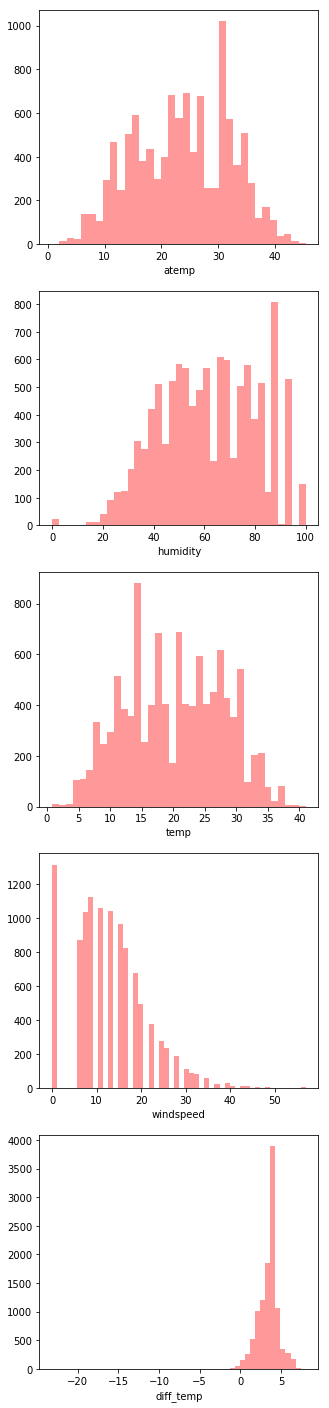

In [69]:
plt.figure(figsize=(5,25))

for i,val in enumerate(Numerical_VarList):
    plt.subplot(511+i)
    sns.distplot(data[data['count'].notnull()][val],kde=False,color='r')
plt.show()    

- 1.`windspeed`存在大量的**0**，可能是数据缺失导致的，因此，需要对这些缺失值进行处理。在此，我们选择randomforest的方法来填补。
- 2.diff_temp存在明显左长尾，在此，我们考虑将小于0的部分全部设置为0。

In [70]:
data['diff_temp'] = data['diff_temp'].apply(lambda x: x if x>=0 else 0)
data['diff_temp'] = data['diff_temp'].apply(lambda x: x if x<=7 else 7)

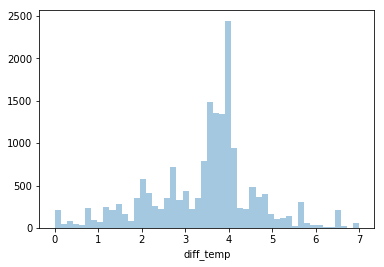

In [71]:
sns.distplot(data['diff_temp'],kde=False)

### impute missing windspeed

In [72]:
WindspeedVars = ['season','weather','humidity','month',
                 'temp','year','atemp','hour','diff_temp']

In [73]:
DataWind = data[WindspeedVars].copy()
DataWind = pd.get_dummies(DataWind)
PredVarsWind0 = DataWind[data['windspeed']==0]
PredVarsWindNot0 = DataWind[data['windspeed']!=0]
WindNot0Value = data.loc[data['windspeed']!=0,'windspeed']
Wind0Value = data.loc[data['windspeed']==0,'windspeed']
print(PredVarsWind0.shape,PredVarsWindNot0.shape)

(2180, 50) (15199, 50)


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error

In [75]:
wind_rf = RandomForestRegressor(random_state=2018,oob_score=True)
param_grid = {'n_estimators':[1000],
              'max_features':[0.3]}
grid_search = GridSearchCV(estimator=wind_rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=3)

In [76]:
grid_search.fit(X=PredVarsWindNot0,y=WindNot0Value)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:   44.3s remaining:   29.5s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=2018, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [1000], 'max_features': [0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [77]:
grid_search.best_params_

{'max_features': 0.3, 'n_estimators': 1000}

In [78]:
wind0Values = grid_search.best_estimator_.predict(X=PredVarsWind0)
windValues = grid_search.best_estimator_.predict(X=PredVarsWindNot0)

In [79]:
mean_absolute_error(y_true=WindNot0Value,y_pred=windValues)

1.4425293947772604

In [80]:
mean_squared_error(y_true=WindNot0Value,y_pred=windValues)

4.327228309388563

In [81]:
mean_squared_log_error(y_true=WindNot0Value,y_pred=windValues)

0.02106984295046538

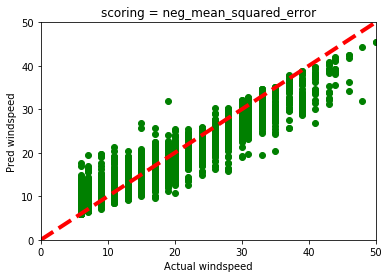

In [82]:
plt.figure()
plt.plot(WindNot0Value,windValues,'go')
plt.plot([0,50],[0,50],'r--',linewidth=4)
plt.axis([0,50,0,50])
plt.xlabel('Actual windspeed')
plt.ylabel('Pred windspeed')
plt.title('scoring = neg_mean_squared_error')
plt.show()

In [83]:
data.loc[data['windspeed'] == 0,'windspeed'] = wind0Values

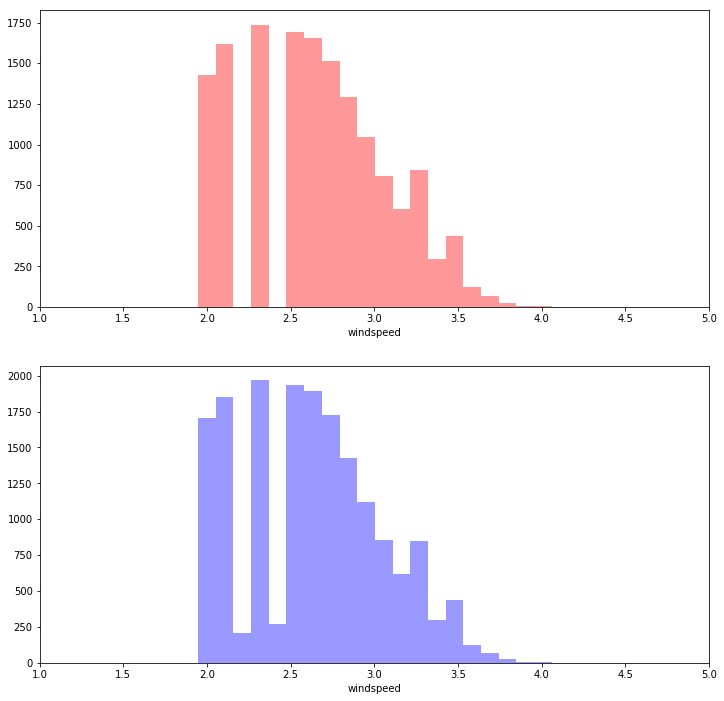

In [84]:
plt.figure(figsize=(12,12))
plt.subplot(211)
sns.distplot(np.log1p(WindNot0Value),kde=False,bins=20,color='r')
plt.xlim([1,5])
plt.subplot(212)
sns.distplot(np.log1p(data['windspeed']),kde=False,bins=20,color='blue')
plt.xlim([1,5])
plt.show()

In [85]:
data['log1p_windspeed'] = np.log1p(data['windspeed'])
data['log1p_casual'] = data['casual'].apply(lambda x: np.nan if x is np.nan else np.log1p(x))
data['log1p_registered'] = data['registered'].apply(lambda x: np.nan if x is np.nan else np.log1p(x))

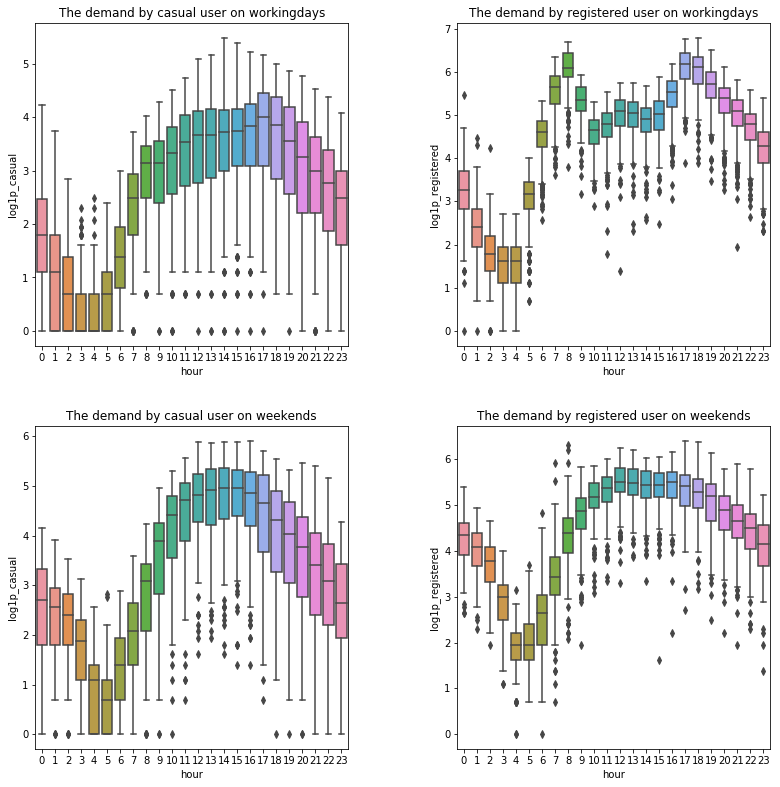

In [86]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(data=data[(data['workingday']==1)&(data['count'].notnull())],x='hour',y='log1p_casual')
plt.title('The demand by casual user on workingdays')
plt.subplot(222)
sns.boxplot(data=data[(data['workingday']==1)&(data['count'].notnull())],x='hour',y='log1p_registered')
plt.title('The demand by registered user on workingdays')
plt.subplot(223)
sns.boxplot(data=data[(data['workingday']==0)&(data['count'].notnull())],x='hour',y='log1p_casual')
plt.title('The demand by casual user on weekends')
plt.subplot(224)
sns.boxplot(data=data[(data['workingday']==0)&(data['count'].notnull())],x='hour',y='log1p_registered')
plt.title('The demand by registered user on weekends')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

In [87]:
print(data['log1p_casual'].isnull().sum())
print(data['count'].isnull().sum())

6493
6493


### Feature selection

In [88]:
print(data.columns)

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'season', 'temp', 'weather', 'windspeed', 'workingday',
       'hour', 'dp_cas', 'dp_reg', 'dh_cas', 'dh_reg', 'dt_cas', 'dt_reg',
       'dat_cas', 'diff_temp', 'weekday', 'date', 'weekend', 'year', 'month',
       'year_part', 'monthday', 'day_type', 'log1p_windspeed', 'log1p_casual',
       'log1p_registered'],
      dtype='object')


In [89]:
VarList = ['atemp','holiday', 'humidity','season', 'temp',
           'weather', 'workingday','hour', 'weekday',
           'year', 'month', 'diff_temp','log1p_windspeed']
Target_VarList = [ 'log1p_casual', 'log1p_registered','count']
Categorical_VarList = ['holiday','season','weather', 'workingday',
                       'hour', 'weekday','year', 'month']
Numerical_VarList = ['atemp','humidity','temp', 'diff_temp','log1p_windspeed']
print(len(Target_VarList),'target variables')
print(len(VarList),'variables for building prediction models')
print(len(Categorical_VarList),'categorical variables')
print(len(Numerical_VarList),'numerical variables')

3 target variables
13 variables for building prediction models
8 categorical variables
5 numerical variables


In [90]:
# DataFrame for feature selection df_FS
df_FS = data[VarList]
print(df_FS.shape)
df_FS = pd.get_dummies(df_FS)
df_FS_train = df_FS.loc[data['count'].notnull()]
df_FS_test = df_FS.loc[data['count'].isnull()]
df_FS_train_target = data.loc[data['count'].notnull(),['casual','registered','count']]
print(df_FS_train.shape)
print(df_FS_test.shape)
print(df_FS_train_target.shape)

(17379, 13)
(10886, 62)
(6493, 62)
(10886, 3)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
evaluate_valid = True

In [92]:
if evaluate_valid == True:
    df_FS_train,df_FS_valid,df_FS_train_target,df_FS_valid_target = train_test_split(df_FS_train,df_FS_train_target,test_size=0.3,random_state=1)
    print(df_FS_train.shape,df_FS_valid.shape)
    print(df_FS_train_target.shape,df_FS_valid_target.shape)

(7620, 62) (3266, 62)
(7620, 3) (3266, 3)


In [93]:
rf_log_casual = RandomForestRegressor(n_estimators=1000,
                                      max_features=0.3,
                                      oob_score=True,
                                      verbose=1,
                                      bootstrap=True,
                                      random_state=2018)
rf_log_registered = RandomForestRegressor(n_estimators=1000,
                                          max_features=0.3,
                                          oob_score=True,
                                          verbose=1,
                                          bootstrap=True,
                                          random_state=2018)

In [94]:
rf_log_casual.fit(X=df_FS_train,y=df_FS_train_target['casual'])

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=2018, verbose=1, warm_start=False)

In [95]:
rf_log_registered.fit(X=df_FS_train,y=df_FS_train_target['registered'])

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   22.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=2018, verbose=1, warm_start=False)

In [96]:
Importance = pd.DataFrame(data=[])
Importance['feature'] = df_FS_train.columns
Importance['casual'] = rf_log_casual.feature_importances_
Importance['registered'] = rf_log_registered.feature_importances_
display(Importance.head())

,feature,casual,registered
0,atemp,0.157434,0.064129
1,humidity,0.158300,0.053753
2,temp,0.122637,0.045391
3,diff_temp,0.040658,0.016964
4,log1p_windspeed,0.036458,0.014982


In [97]:
display(Importance.sort_values('casual',ascending=False).head(15))

,feature,casual,registered
1,humidity,0.158300,0.053753
0,atemp,0.157434,0.064129
2,temp,0.122637,0.045391
15,workingday_0,0.059134,0.052318
16,workingday_1,0.057140,0.053993
3,diff_temp,0.040658,0.016964
4,log1p_windspeed,0.036458,0.014982
46,weekday_5,0.021817,0.011189
30,hour_13,0.020901,0.002152
32,hour_15,0.017021,0.001275


In [98]:
display(Importance.sort_values('registered',ascending=False).head(15))

,feature,casual,registered
34,hour_17,0.011592,0.110285
35,hour_18,0.008418,0.088777
25,hour_8,0.002076,0.085839
0,atemp,0.157434,0.064129
16,workingday_1,0.057140,0.053993
1,humidity,0.158300,0.053753
15,workingday_0,0.059134,0.052318
2,temp,0.122637,0.045391
48,year_2011,0.015782,0.037661
49,year_2012,0.015303,0.037437


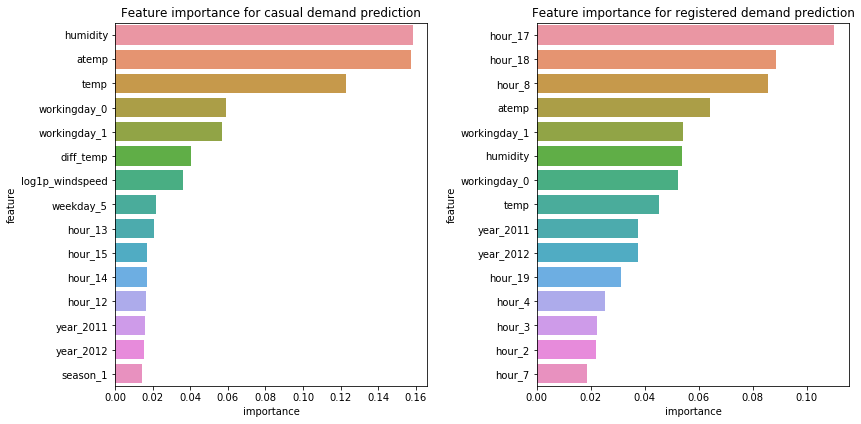

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.barplot(data=Importance.sort_values('casual',ascending=False).head(15),y='feature',x='casual',orient='h')
plt.xlabel('importance')
plt.title('Feature importance for casual demand prediction')
plt.subplot(122)
sns.barplot(data=Importance.sort_values('registered',ascending=False).head(15),y='feature',x='registered',orient='h')
plt.xlabel('importance')
plt.title('Feature importance for registered demand prediction')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

In [100]:
if evaluate_valid == True:
    pred_log_casual = rf_log_casual.predict(df_FS_valid)
    pred_log_registered = rf_log_registered.predict(df_FS_valid)
else:
    pred_log_casual = rf_log_casual.predict(df_FS_test)
    pred_log_registered = rf_log_registered.predict(df_FS_test)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


In [101]:
pred_casual = pred_log_casual
pred_registered = pred_log_registered

In [102]:
pred_count = pred_casual+pred_registered
if evaluate_valid == True:
    print('Training RMSLE',np.sqrt(mean_squared_log_error(df_FS_valid_target['count'],pred_count)))

Training RMSLE 0.5618431540435962


In [103]:
if evaluate_valid == False:
    Submission = pd.read_csv('../inputs/sampleSubmission.csv')
    Submission['count'] = pred_count
    Submission.to_csv('../inputs/submission.csv',index=False)

将每个月前20天的median作为新的特征，还有交叉几个特征进行组合。